In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [2]:
#1. Загрузить файл hr.csv
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


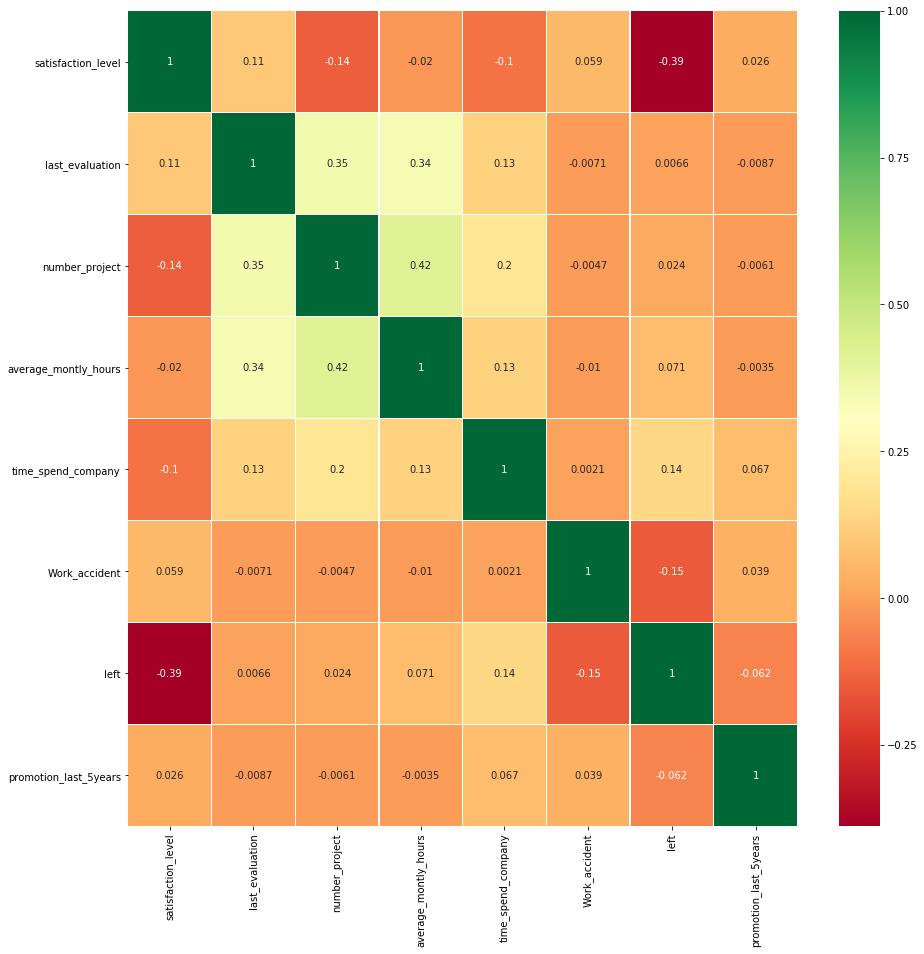

In [4]:
#3. Рассчитать и визуализировать корреляционную матрицу для переменных
correlation_matrix = data.corr(method ='pearson')
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, yticklabels=True,xticklabels=True, annot=True, cmap='RdYlGn',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

In [10]:
#4. Визуализировать несколько взаимосвязей между переменными

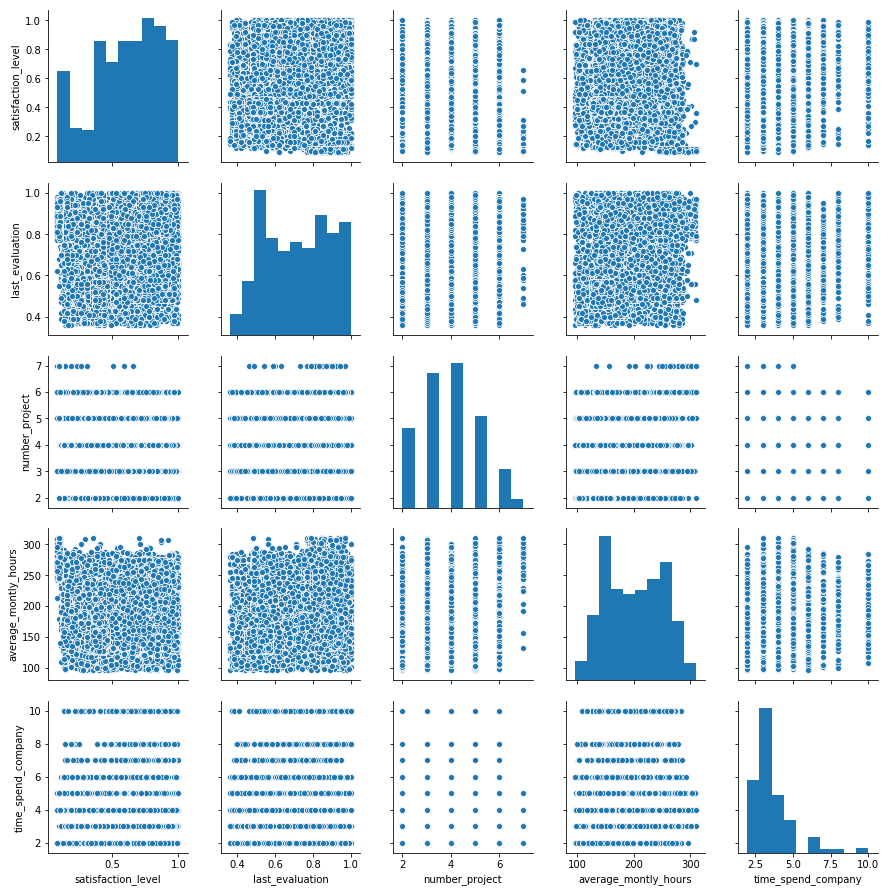

In [5]:
sns.pairplot(data.iloc[:,:5])

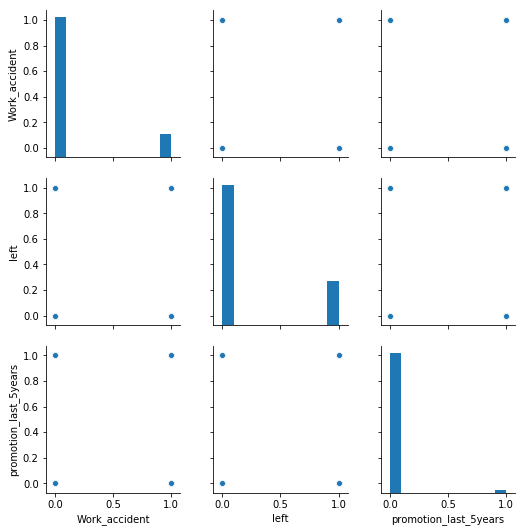

In [7]:
sns.pairplot(data.iloc[:,5:10])

In [8]:
data.salary.isnull().sum()

0

In [53]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
#5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [88]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [58]:
stats.ttest_ind(data[data['left']==1]['last_evaluation'].sample(n=3000),
                data[data['left']==0]['last_evaluation'].sample(n=3000))

Ttest_indResult(statistic=0.9919261707066707, pvalue=0.3212735548447546)

Исходя из того, что p-value больше чем 0.05 - мы можем сказать что last_evaluation у ушедших и оставшихся схожи.

In [70]:
stats.ttest_ind(data[data['left']==1]['satisfaction_level'].sample(n=3000),
                data[data['left']==0]['satisfaction_level'].sample(n=3000))

Ttest_indResult(statistic=-37.83491945343469, pvalue=4.0465669778896454e-281)

а вот смотря на satisfaction_level можно сказать что выборки отличаются и статистически значимы.

In [79]:
print( data[data['left']==1]['satisfaction_level'].mean(),
      data[data['left']==0]['satisfaction_level'].mean(),
      data[data['left']==1]['last_evaluation'].mean(),
      data[data['left']==0]['last_evaluation'].mean())

0.44009801176140917 0.666809590479516 0.7181125735088183 0.7154733986699274


средние данных показателей тоже говорят о том, что satisfaction_level отличается у ушедших и осавшихся, в отличии от last_evaluation 

In [131]:
stats.ttest_ind(data[data['left']==1]['average_montly_hours'].sample(n=3000),
                data[data['left']==0]['average_montly_hours'].sample(n=3000))

Ttest_indResult(statistic=5.542924594157477, pvalue=3.101375375934461e-08)

207.41921030523662 199.0602030101505


In [81]:
#6.Рассчитать сколько работников работает в каждом департаменте
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

0    11428
1     3571
Name: left, dtype: int64

In [18]:
def to_num(item):
    if item == 'low':
        return 1
    elif item == 'medium':
        return 2
    else:
        return 3

In [19]:
data['salary'] = data['salary'].apply(to_num)

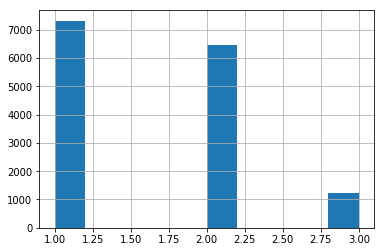

In [22]:
#7. Показать распределение сотрудников по зарплатам
data['salary'].hist()

In [132]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [168]:
#8. Показать распределение сотрудников по зарплатам совместно с департаментами
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

sales


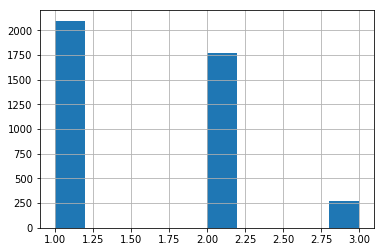

accounting


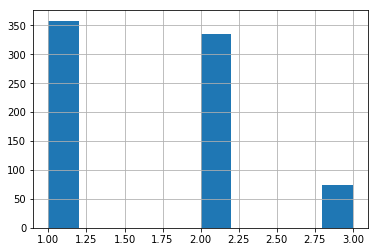

hr


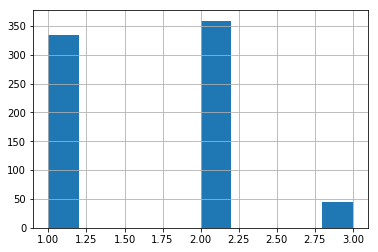

technical


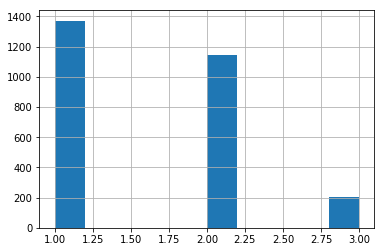

support


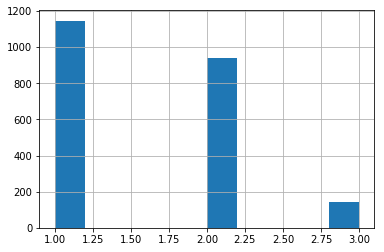

management


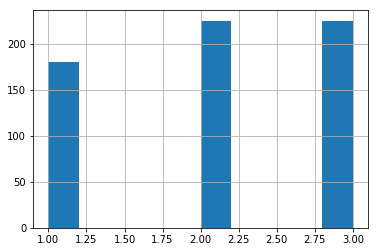

IT


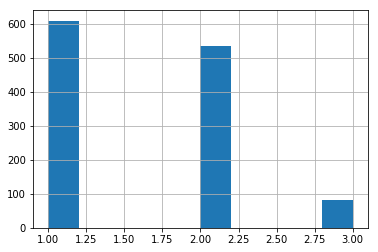

product_mng


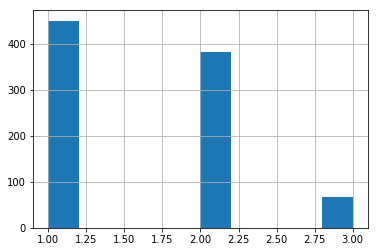

marketing


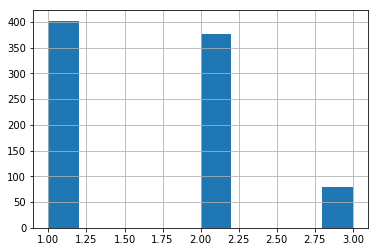

RandD


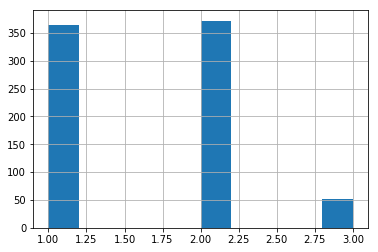

In [167]:

for cat in data['sales'].unique():
    data[data['sales'] == cat]['salary'].hist(label=cat)
    print(cat)
#     plt.legend(cat)
    #plt.set_title(cat)
    plt.show()

Распределение между отделами схожи, отличается сильно management - hight запрплата больше чем у оставльных.

В остальном распределения отличаются кол-вом со средней зарплатой.

In [169]:
#9. Сколько сотрудников покинули компанию
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
#10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [170]:
data_copy = data

In [172]:
target =  data_copy['left'] 
target.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [178]:
del data_copy['left']
del data_copy['sales']

In [174]:
data_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,1
1,0.80,0.86,5,262,6,0,0,sales,2
2,0.11,0.88,7,272,4,0,0,sales,2
3,0.72,0.87,5,223,5,0,0,sales,1
4,0.37,0.52,2,159,3,0,0,sales,1


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# targets=(output_y.iloc[:,:]==1).idxmax(1)
# print(targets.value_counts())
# Y=le.fit_transform(targets)

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_copy, target, test_size=0.2)

No handles with labels found to put in legend.


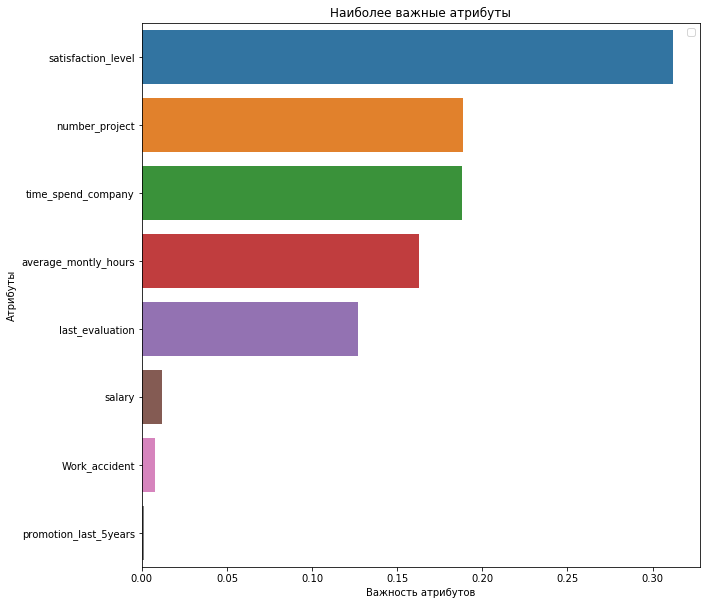

In [180]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [182]:
model.score(X_test, y_test)

0.992

Исходя из графика, можно сказать, что наиболее важный атрибут - satisfaction_level
за ним идут number_project и time_spend_company

In [185]:
#1. Загрузить файл hr.csv
data=pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [186]:
data[data['left'] == 1].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [187]:
data[data['left'] == 0].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


Если посмотреть на среднее и на квантили по данным, то видно:
satisfaction_level в среднем выше у тех, кто оставлся
третий квантиль number_project ниже у тех, кто остался, что означает, что было больше ушедших людей, у которых 6 проектов.



Отсюда можно сделать вывод, что если у человека низкий satisfaction_level и высокий number_project- скорее всего он уйдет.